In [1]:
#Design and develop a convolutional neural network for image classification
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [2]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [3]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential()

    # Conv Layer 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Conv Layer 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Conv Layer 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # To reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = create_cnn_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/5
782/782 - 117s - 150ms/step - accuracy: 0.4038 - loss: 1.6232 - val_accuracy: 0.5528 - val_loss: 1.2629
Epoch 2/5
782/782 - 140s - 179ms/step - accuracy: 0.5617 - loss: 1.2355 - val_accuracy: 0.6412 - val_loss: 1.0182
Epoch 3/5
782/782 - 142s - 181ms/step - accuracy: 0.6254 - loss: 1.0706 - val_accuracy: 0.6753 - val_loss: 0.9358
Epoch 4/5
782/782 - 116s - 148ms/step - accuracy: 0.6676 - loss: 0.9578 - val_accuracy: 0.6990 - val_loss: 0.8792
Epoch 5/5
782/782 - 137s - 175ms/step - accuracy: 0.6938 - loss: 0.8807 - val_accuracy: 0.7030 - val_loss: 0.8665


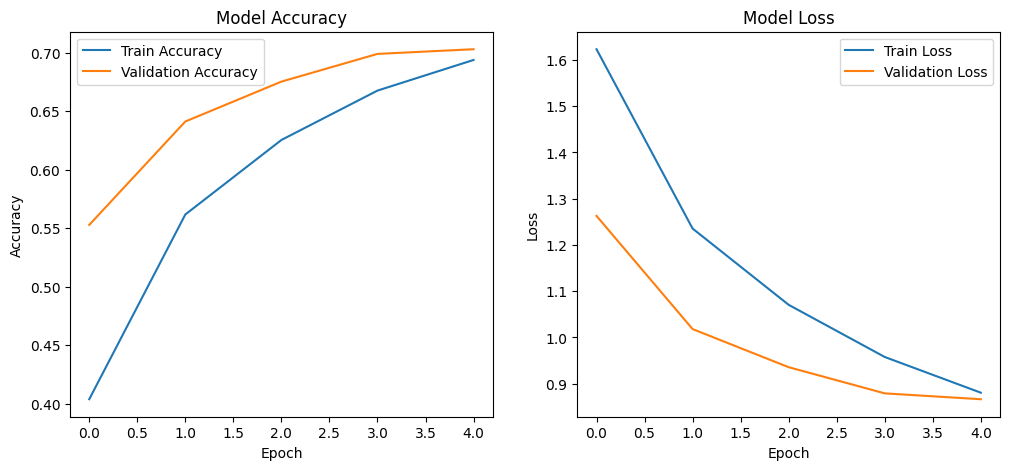

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Saving doggggg.jpg to doggggg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Prediction: dog (Confidence: 0.50)


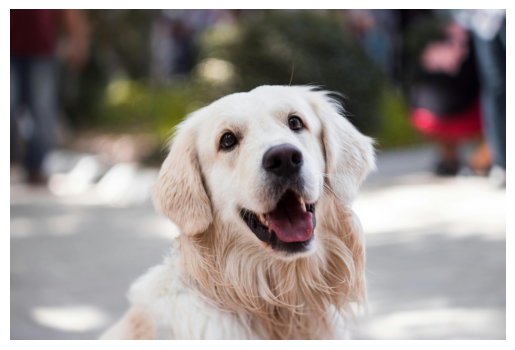

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image

# Save the trained model first, as it was not explicitly saved previously.
# This assumes the 'model' object from previous cells is the one intended for use.
model.save('cifar10_cnn_model.h5')

# Load the trained model (now it exists)
model = tf.keras.models.load_model('cifar10_cnn_model.h5')

# Define CIFAR-10 class names for display
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Upload image from user
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    # Resize image to (32, 32) to match the input shape of the trained CIFAR-10 model
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0   # Normalize

    prediction = model.predict(img_array)

    # Classification for 10 classes (CIFAR-10)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = cifar10_class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    print(f"Prediction: {predicted_class_name} (Confidence: {confidence:.2f})")

    # Show uploaded image
    plt.imshow(Image.open(img_path))
    plt.axis("off")
    plt.show()
